<a href="https://colab.research.google.com/github/guilhermebr84/XPE_aula_bootcamp_analistadedados4.5/blob/main/aula_Bootcamp_analista_dados_aula_4dot5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Coletando Dados

In [ ]:
custo_diaria = pd.read_csv('/content/custo_diaria.csv', sep=';')

In [ ]:
#visualizando arquivos
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [ ]:
# gerar estatisca
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [ ]:
# verficar valor nulo ou ausente
custo_diaria.isna().sum()

qtd_pessoas     0
valor_diaria    0
dtype: int64

In [ ]:
# verificar informações base de dados
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   15 non-null     int64
 1   valor_diaria  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [ ]:
# correlacao entre variaveis
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.992069
valor_diaria,0.992069,1.000000


<Axes: >

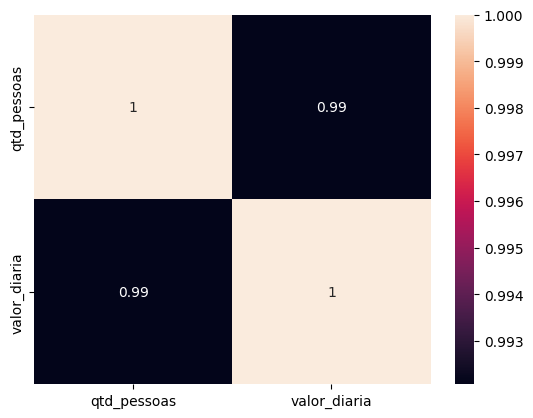

In [ ]:
# analise grafica da correlação entre variaveis
correlacao = custo_diaria.corr()
sns.heatmap(correlacao, annot=True)

In [ ]:
# criar variavel Independente - X
X = custo_diaria.iloc[:,0].values
print (X);
# usei um "X" maiusculo mesmo de proposito

[ 1  4  6 10 13 15 18 22 25 30 40 42 45 47 50]


In [ ]:
# criar variavel Dependente - Y (o que queremos predizer)
Y = custo_diaria.iloc[:,1].values
print (Y);

[ 150  385  499  680  735  859  989 1075 1500 1850 2000 2089 2250 2488
 2680]


In [ ]:
# verificar os tipos das variaveis
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X.shape

(15,)

In [ ]:
#transformando array em matriz
X = X.reshape(-1,1)

In [ ]:
X.shape
# temos 15 linhas e 1 coluna

(15, 1)

In [ ]:
#criando um modelo de machine learning - regressao linear
from sklearn.linear_model import LinearRegression
predicao_custo_diaria = LinearRegression()

In [ ]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

In [ ]:
#realizando o treinamento do modelo
predicao_custo_diaria.fit(X,Y)

LinearRegression()

In [ ]:
#calcular constante alfa - intercept
predicao_custo_diaria.intercept_

155.91874556932066

In [ ]:
#calcular constante coeficiente angular da reta - coef
predicao_custo_diaria.coef_

array([48.61472504])

In [ ]:
#realizando a predição de valores de diarias
previsao_valores = predicao_custo_diaria.predict(X)
print(previsao_valores)

[ 204.53347061  350.37764575  447.60709584  642.06599602  787.91017115
  885.13962124 1030.98379637 1225.44269655 1371.28687169 1614.36049691
 2100.50774736 2197.73719745 2343.58137258 2440.81082267 2586.65499781]


In [ ]:
#grafico 1 - grafico de dispersao
grafico1 = px.scatter(x = X.ravel(), y=Y)
grafico1.show()

In [ ]:
grafico2 = px.scatter(x = X.ravel(), y = Y)
grafico2.add_scatter(x = X.ravel(), y = previsao_valores, name = 'previsões')
grafico2.show()

In [ ]:
#calcular o valor da diaria de acordo com a equacao linear
alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 10

alfa + beta * Xi

array([642.06599602])

In [ ]:
#calcuar o valor da diaria atraves da funcao predict modelo
predicao_custo_diaria.predict([[10]])

array([642.06599602])

In [ ]:
#calcular acuracia
predicao_custo_diaria.score(X,Y)

0.984200996064679

In [ ]:
#calcular o mean absolut error
mean_absolute_error(Y, previsao_valores)

83.84480977618742

In [ ]:
#calcular o mean squared error
MSE = mean_squared_error(Y, previsao_valores)
print(MSE)

9989.829839426571


In [ ]:
#calcular o root mean squared error
np.sqrt(MSE)

99.9491362615334